# CMPINF 2120 – Applied Predictive Modelling
## Decision Trees -- Hands-On Project
### Last updated: Wed Apr  9 16:08:29 EDT 2025
In this Project, we will learn how to do classification with decision trees using scikit-learn python package.

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree, metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
%matplotlib inline

## Decision Trees
Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

We will go through an example of binary classfication using decision trees on titanic survival dataset.

In [2]:
dt = pd.read_csv('titanic.csv')
row_count = len(dt)
print (f"There are {row_count} passengers in our dataset")
dt.head()

There are 891 passengers in our dataset


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S


The attributes of the dataset are as follows:
    - survival        Survival
                    (0 = No; 1 = Yes)
    - pclass          Passenger Class
                    (1 = 1st; 2 = 2nd; 3 = 3rd)
    - name            Name
    - sex             Sex
    - age             Age
    - sibsp           Number of Siblings/Spouses Aboard
    - parch           Number of Parents/Children Aboard
    - embarked        Port of Embarkation
                    (C = Cherbourg; Q = Queenstown; S = Southampton)
Our target class variable is _Survived_, whether  the passenger survived or not. We will use only a subset of attributes that take discreet values to build our decision tree.

To fit a decision tree model, we will have to convert the categoricalvalues into numerical values. As the only categorical attribute we will use is _Sex_, we will only need to convert that column into numerical values using the following commands.

In [3]:
dt['Sex'] = dt['Sex'].replace(['female', 'male'], [1, 2])
dt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",2,22.0,1,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,S
4,5,0,3,"Allen, Mr. William Henry",2,35.0,0,0,S


### Train & Test Split
We will split our data into train and test set using the first 800 rows for training and the rest for testing.

In [4]:
split_point = 800
dt_train_x = dt.iloc[:split_point][['Pclass','Sex','SibSp']].values
dt_train_y = dt.iloc[:split_point][['Survived']].values

dt_test_x = dt.iloc[split_point+1:][['Pclass','Sex','SibSp']].values
dt_test_y = dt.iloc[split_point+1:][['Survived']].values

Consider modifying the split point number (e.g., change it to 700 or to 850) and running the entire notebook again to see how that changes the accuracy. There are 891 rows in our dataset.

### Fit
We will now fit our decision tree model onto the training set. We will use the built-in decision tree classifier from scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [5]:
#clf = tree.DecisionTreeClassifier(criterion='gini') # Uncomment to use the gini metric for deciding splits
clf = tree.DecisionTreeClassifier(criterion='entropy') # Uncomment to use the entropy metric for deciding splits

clf = clf.fit(dt_train_x, dt_train_y)

### Predict

In [6]:
dt_predict_y = clf.predict(dt_test_x)
## comparing predicted and actual values
np.column_stack((dt_predict_y,dt_test_y))

array([[1, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0,

### Accuracy
We can measure the accuracy of our prediction by using the following commands.

In [9]:
accuracy = metrics.accuracy_score(dt_test_y,dt_predict_y)
#convert to percent
accuracy = 100*accuracy
print ("Prediction Accuracy = %.2f%%" % accuracy)

Prediction Accuracy = 80.00%


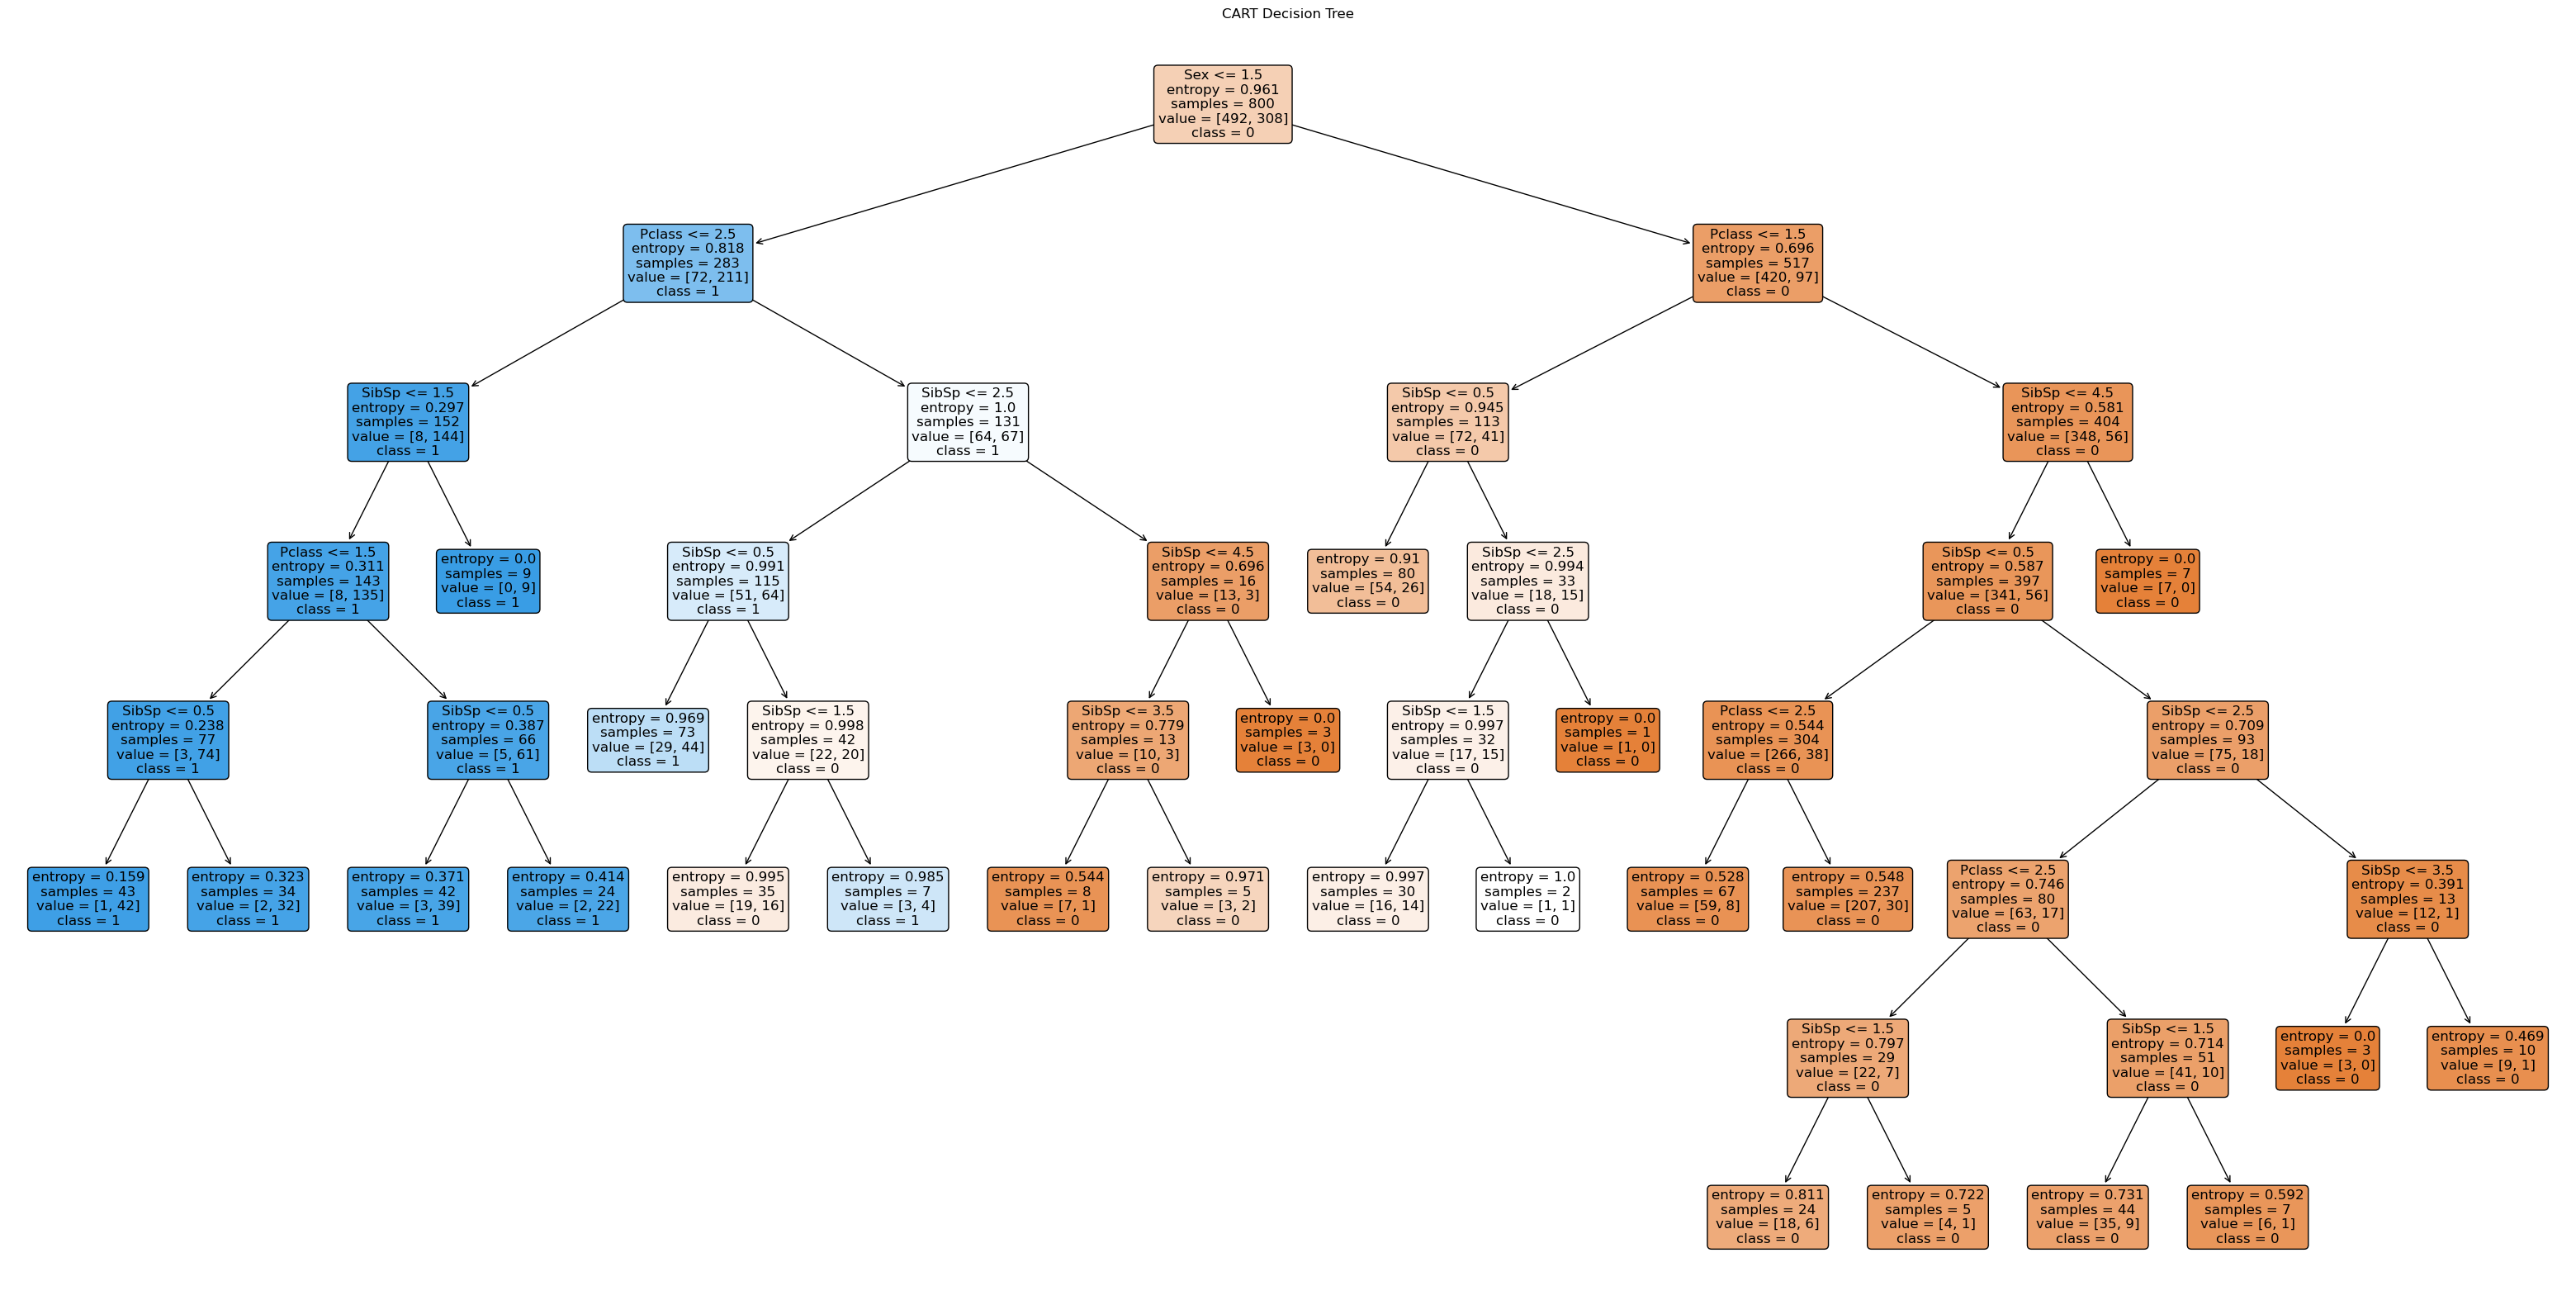

In [10]:
# Visualize the decision tree
plt.figure(figsize=(40, 20))
plot_tree(clf,
          feature_names=['Pclass','Sex','SibSp'],
          class_names=['0','1'],
          filled=True,
          rounded=True,
          fontsize=12)
plt.title("CART Decision Tree")
plt.show()
